In [2]:
import numpy as np
from scipy.signal import argrelmin
import matplotlib.pyplot as plt
# plt.style.use('~/Dropbox/matplotlib_styles/line_plot.mplstyle')
import json
import os
from pathlib import Path

C6 = 2 * np.pi * 862690

In [3]:
a_ax = []
energies = []
densities = []
d2E2 = []
d2E2_minima = []

d_name = "23-06-16_23-12-32_phase_diagram_data"
f_names = os.listdir(d_name)

for f_name in f_names:

  with open(Path(d_name, f_name), 'r') as f:
    data_dict = json.load(f)
    
  energies.append(data_dict["results"]["energies"])
  densities.append(data_dict["results"]["rydberg_densities"])

  delta_ax = data_dict["params"]["delta_ax"]
  hamiltonian_params = data_dict["params"]["hamiltonian_params"]
  dmrg_params = data_dict["params"]["dmrg_params"]

  a_ax.append(hamiltonian_params["a"])

delta_ax = np.array(delta_ax)
d_delta = delta_ax[1] - delta_ax[0]

for energy in energies:
  temp = np.gradient(energy, delta_ax, edge_order=2)
  temp = np.gradient(temp, delta_ax, edge_order=2)

  d2E2.append(temp)
  d2E2_minima.append(np.argmin(temp))

omega = hamiltonian_params["omega"]
Rb = (C6 / omega) ** (1 / 6)

In [4]:
energies = np.array([x for _, x in sorted(zip(a_ax, energies))])
d2E2 = np.array([x for _, x in sorted(zip(a_ax, d2E2))])
d2E2_minima = np.array([x for _, x in sorted(zip(a_ax, d2E2_minima))])
densities = np.array([x for _, x in sorted(zip(a_ax, densities))])
a_ax = np.sort(a_ax)

minima_x = []
minima_y = []
for ii, a in enumerate(a_ax):
    # for minimum in d2E2_minima[ii]:
    #     minima_x.append(delta_ax[minimum] / omega)
    #     minima_y.append(Rb / a)
    minimum = d2E2_minima[ii]

    if minimum == 0 or minimum == len(delta_ax) - 1:
        continue
    else:
        minima_x.append(delta_ax[minimum] / omega)
        minima_y.append(Rb / a)

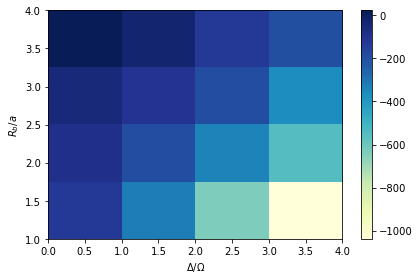

In [5]:
plt.imshow(energies, cmap="YlGnBu", extent=(delta_ax[0] / omega, delta_ax[-1] / omega, Rb / a_ax[-1], Rb / a_ax[0]), aspect="auto", origin="upper")
plt.colorbar()

plt.scatter(minima_x, minima_y, s=100, c='red', marker="*")

plt.xlabel(r"$\Delta/\Omega$")
plt.ylabel(r"$R_b/a$") #Check this axis orientation, etc

plt.tight_layout()
plt.show()

In [6]:
a_ind = -1
delta_ind = 40

plt.plot(densities[a_ind, delta_ind], 'ko')
plt.title(fr"$R_b / a=${Rb / a_ax[a_ind]:.1f}, $\Delta/\Omega$ = {delta_ax[delta_ind]/omega:.1f}")
plt.tight_layout()
plt.show()

IndexError: index 40 is out of bounds for axis 1 with size 4